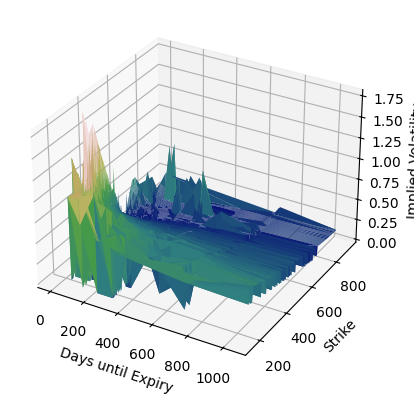

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import brentq
from math import log, sqrt, exp
from scipy.stats import norm
import matplotlib.pyplot as plt
from datetime import datetime, date
from mpl_toolkits import mplot3d
from matplotlib import cm

def opt_price(S, K, r, t, sigma, q, call):
    d1 = (log(S / K) + ((r - q + ((sigma ** 2) / 2)) * t)) / (sigma * sqrt(t))
    d2 = d1 - (sigma * sqrt(t))
    if call:
        return S * exp(-q * t) * norm.cdf(d1) - K * exp(-r * t) * norm.cdf(d2)
    return K * exp(-r * t) * norm.cdf(-d2) - S * exp(-q * t) * norm.cdf(-d1)

def implied_vol(price, S, K, t, r, q, call):
    init_sigma = 0.1
    for i in range(100):
        Cprime = S * sqrt(t) * norm.pdf((log(S / K) + ((r - q + ((init_sigma ** 2) / 2)) * t)) / (init_sigma * sqrt(t)))
        bs_price = opt_price(S, K, r, t, init_sigma, q, call)
        C = bs_price - price
        new_sigma = init_sigma - (C / Cprime)
        init_sigma = new_sigma
        if abs(init_sigma) < .001:
            return init_sigma
    return init_sigma



ticker = yf.Ticker('SPY')

exps = ticker.options

options = []

for expiry in exps:
    chain = ticker.option_chain(expiry)
    for i in range(len(chain.calls["strike"])):
        options.append([expiry, chain.calls["strike"][i], chain.calls["impliedVolatility"][i]])
    for i in range(len(chain.puts["strike"])):
        options.append([expiry, chain.puts["strike"][i], chain.puts["impliedVolatility"][i]])





length = len(options)
x = [(datetime.strptime(options[i][0], "%Y-%m-%d").date() - date.today()).days for i in range(length)]
y = [options[i][1] for i in range(length)]
z = [options[i][2] for i in range(length)]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ax.plot_trisurf(x, y, z, cmap=cm.gist_earth)

ax.set_xlabel("Days until Expiry")
ax.set_ylabel("Strike")
ax.set_zlabel("Implied Volatility")
plt.show()





